# 브로드캐스팅(Broadcasting)

넘파이 모듈의 어레이 관련 연산은 기본적으로 항목별로 실행된다.
따라서 두 개의 어레이를 대상으로 연산을 하려면 모양(shape)이 같아야 한다. 

하지만 경우에 따라 모양이 다른 두 어레이를 이용하여 연산을 할 수 있다.
이를 위해서는 두 어레이의 모양을 동일하게 맞추는 일이 가능해야 한다.
두 어레이의 모양을 맞추는 과정을 **확산(broadcasting)**이라 부른다. 

아래 그림을 통해 확산이 작동하는 방식을 이해할 수 있다.

<img src="images/broadcasting.png" width="550">

In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


먼저 아래의 행렬에 해당하는 어레이를 생성한다. 

$$ a = 
\left [ \begin{matrix} 
0 & 0 & 0 \\ 
10 & 10 & 10 \\
20 & 20 & 20\\
30 & 30 & 30
\end{matrix} \right ]$$

In [3]:
a = np.tile(np.arange(0, 40, 10), (3,1)).T
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

이제 아래 모양의 어레이를 생성한다. 

$$b = 
\left [ \begin{matrix} 
0 & 1 & 2
\end{matrix} \right ]$$

In [4]:
b = np.array([0, 1, 2])
b

array([0, 1, 2])

`a`와 `b`의 합을 실행하기 위해 먼저 `b`를 확산하여 `a`의 모양과 맞춘다.

$$
\left [ 
\begin{matrix} 
0 & 1 & 2
\end{matrix} 
\right ]
\quad\Longrightarrow\quad
\left [ 
\begin{matrix} 
0 & 1 & 2\\
0 & 1 & 2\\
0 & 1 & 2\\
0 & 1 & 2
\end{matrix} 
\right ]
$$

In [5]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

이제 아래 모양의 덧셈이 어떻게 실행되는지 살펴보자.

$$
\left [ \begin{matrix} 
0\\ 
10\\
20\\
30
\end{matrix} \right ]
+
\left [ \begin{matrix} 
0 & 1 & 2
\end{matrix} \right ]
$$

먼저 아래 행렬에 해당하는 어레이를 생성하자.

$$
\left [ \begin{matrix} 
0\\ 
10\\
20\\
30
\end{matrix} \right ]
$$

위 행렬에 해당하는 어레이는 `(4, 1)`  모양의 2차원 어레이임에 주의해야 한다.

In [6]:
c = np.array([0, 10, 20, 30]).reshape((4,1))
c

array([[ 0],
       [10],
       [20],
       [30]])

이제 `c + b`를 실행하기 위해서는 `c`와 `b` 각각을 `(4,3)` 모양으로 확산해야 한다. 

* `c`의 경우: `(4,1)` 모양의 어레이 이므로 열을 2칸 늘려야 한다. 즉, 

$$
\left [ 
\begin{matrix} 
0\\ 
10\\
20\\
30
\end{matrix} 
\right ]
\quad\Longrightarrow\quad
\left [ 
\begin{matrix} 
0 & 0 & 0\\
10 & 10 & 10\\
20 & 20 & 20\\
30 & 30 & 30
\end{matrix} 
\right ]
$$

* `b`의 경우: `(3,)` 모양이므로 행 방향으로 3칸 틀려야 한다. 즉,

$$
\left [ 
\begin{matrix} 
0 & 1 & 2
\end{matrix} 
\right ]
\quad\Longrightarrow\quad
\left [ 
\begin{matrix} 
0 & 1 & 2\\
0 & 1 & 2\\
0 & 1 & 2\\
0 & 1 & 2
\end{matrix} 
\right ]
$$

In [7]:
c + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

어레이와 숫자의 연산은 사실 확산을 사용한 것이다.

In [8]:
a = np.ones((4,5))
a

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

`a[0] = 2` 를 실행하면 `a`의 0번 행의 값들을 모두 2로 교체하는데 이는 실제로는 
`a[0] = array[2, 2, 2, 2, 2]` 를 실행하는 것이다. 
즉, 확산을 먼저 실행한 후에 교체를 진행한다.

In [9]:
a[0] = 2
a

array([[ 2.,  2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

## 차원 늘리기

앞서 `c = np.array([0, 10, 20, 30]).reshape((4,1))`를 이용하여
아래 모양의 행렬을 

$$
\left [ \begin{matrix} 
0 & 10 & 20 & 30
\end{matrix} \right ]
$$

다음 모양의 행렬로 변경하였다. 
$$
\left [ \begin{matrix} 
0\\ 
10\\
20\\
30
\end{matrix} \right ]
$$

위 과정을 차원 늘리기 기능을 이용하여 쉽게 구현할 수 있다.

In [10]:
a = np.arange(0, 40, 10)
a

array([ 0, 10, 20, 30])

In [11]:
a.shape

(4,)

In [12]:
a = a[:, np.newaxis]

In [13]:
a.shape

(4, 1)

In [14]:
a

array([[ 0],
       [10],
       [20],
       [30]])

## 연습문제

NB-18-Numpy-array-indexing-slicing에서 다뤘던 어레이는 다음 모양을 갖는다.

<table>
  <tr>
    <td align=center>0</td>
    <td align=center>1</td> 
    <td align=center>2</td>
    <td align=center>3</td>
    <td align=center>4</td>
    <td align=center>5</td>
  </tr>
  <tr>
    <td>10</td>
    <td>11</td> 
    <td>12</td>
    <td>13</td>
    <td>14</td>
    <td>15</td>
  </tr>
  <tr>
    <td>20</td>
    <td>21</td> 
    <td>22</td>
    <td>23</td>
    <td>24</td>
    <td>25</td>
  </tr>
  <tr>
    <td>30</td>
    <td>31</td> 
    <td>32</td>
    <td>33</td>
    <td>34</td>
    <td>35</td>
  </tr>
  <tr>
    <td>40</td>
    <td>41</td> 
    <td>42</td>
    <td>43</td>
    <td>44</td>
    <td>45</td>
  </tr>
  <tr>
    <td>50</td>
    <td>51</td> 
    <td>52</td>
    <td>53</td>
    <td>54</td>
    <td>55</td>
  </tr>
</table>

위와 같은 모양의 어레이는 아래와 같은 방식으로 생성할 수 있다.

    np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis]
    
위 코드가 어떻게 해서 원하는 모양의 어레이를 생성하는지 구체적으로 설명하라.

## 예제

미국의 동서를 가로지르는 66번 도로가 통과하는 주요 도시들은 
동쪽에서부터 차례대로 다음과 같다. 
Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City,
Amarillo, Sata Fe, Albuquerque, Flagstaff, Los Angeles

<img src="images/usa-cross.png" width="450">

또한 시카고를 기점으로 해서 언급된 순서대로의 도시까지의 거리는 마일(mile) 단위로 다음과 같다.
참고로 1마일은 1.6키로 정도이다.

In [15]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

즉, Chicago와 Springfield 사이의 거리는 198마일이고 
Chicago와 Los Angeles 사이의 거리는 2448마일이다.

이제 임이의 두 도시 사이의 거리를 구해보자. 
확산과 빼기, 절대값 연산을 이용하면 쉽게 구할 수 있다.

In [16]:
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])

위 결과는 격자판(그리드, grid) 모양의 어레이이다.

In [17]:
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

예를 들어, Santa Fe와 Flagstaff 사이의 거리는 `distance_array[7, 9]`이다.

In [18]:
distance_array[7, 9]

904

## 연습문제

앞서 66번 도로 상에 위치한 10개의 주요도시에서 타 도시까지의 거리를 계산하였다.
그렇다면 각 도시에서 타도시까지의 거리의 평균을 구하라.
또한 임의의 두 도시 사이의 거리는 평균 얼마인지 구하라.

예를 들어, Chicago에서 타도시까지의 거러의 평균은 

    In [29]: mileposts.mean() * (10./9)
    Out[29]: 1184.7777777777778
    
10.0/9 를 곱해주는 이유는 Chicago에서 Chicago 까지의 거리인 0을 제외하기 위해서이다.

힌트: 축(axis)을 이용한다. 

## 예제

아래 좌표들로 구성된 점들의 집합을 고려해보자.

$$ A= 
\left \{ \begin{matrix} 
(0,0), & (0,1), & (0,2), & (0, 3), & (0,4), \\ 
(1,0), & (1,1), & (1,2), & (1, 3), & (1,4), \\ 
(2,0), & (2,1), & (2,2), & (2, 3), & (2,4), \\ 
(3,0), & (3,1), & (3,2), & (3, 3), & (3,4), \\ 
(4,0), & (4,1), & (4,2), & (4, 3), & (4,4)
\end{matrix} \right \}$$

위 점들 각각에 대해 원점으로부터의 거리를 구해보자. 
즉, 아래 그림에서 표시된 각 점들과 원점사이의 거리를 구해보자.

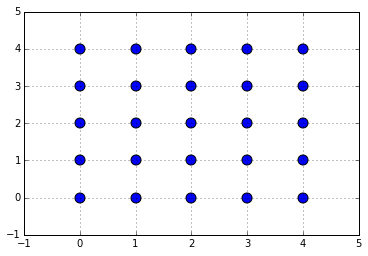

In [19]:
x = np.repeat(np.arange(0, 5), 5)
y = np.tile(np.arange(0, 5), 5)

plt.scatter(x,y, s=100 ,marker='o')

plt.grid()
plt.show()

앞서의 예제와 같이 격자판(grid) 모양의 데이터를 분석하는 방식으로 처리할 수 있다. 
즉, 차원 늘리기와 확산을 이용한다. 

먼저 위 좌표들은 아래 두 개의 어레이들의 이용한 순서쌍으로 만들 수 있음에 주목한다. 

In [20]:
x = np.arange(5)
x

array([0, 1, 2, 3, 4])

In [21]:
y = np.arange(5)[:, np.newaxis]
y

array([[0],
       [1],
       [2],
       [3],
       [4]])

왜냐하면 `x`와 `y`의 각각의 항목값을 좌표로 갖는 점들이 위 그림에서 표시된 점들이기 때문이다.

그리고 각 점들의 원점으로부터의 거리는 피타고라스 정리에 의해 결정된다.
예를 들어, `(a, b)`의 좌표를 갖는 점은 원점으로부터의 거리가 

$$ \sqrt{a^2 + b^2}$$

이다. 따라서 아래와 같이 각 점의 원점으로부터의 거리를 구할 수 있다.

**주의**: 확산이 자동으로 사용된다.

In [22]:
distance = np.sqrt(x ** 2 + y ** 2)
distance

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 1.        ,  1.41421356,  2.23606798,  3.16227766,  4.12310563],
       [ 2.        ,  2.23606798,  2.82842712,  3.60555128,  4.47213595],
       [ 3.        ,  3.16227766,  3.60555128,  4.24264069,  5.        ],
       [ 4.        ,  4.12310563,  4.47213595,  5.        ,  5.65685425]])

참고로, 위 좌표값들의 집합 $A$는 다음과 같은 방식으로 구해질 수 있다.

In [23]:
A = np.transpose([np.repeat(np.arange(5), 5), np.tile(np.arange(5), 5)])
A

array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [1, 0],
       [1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [2, 0],
       [2, 1],
       [2, 2],
       [2, 3],
       [2, 4],
       [3, 0],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [4, 0],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 4]])

이제 원점으로부터의 거리를 색깔로 표시하여 거리정도를 확인할 수도 있다.
넘파이의 `pcolor` 함수를 이용하면 된다.

<matplotlib.colorbar.Colorbar instance at 0x107701e60>

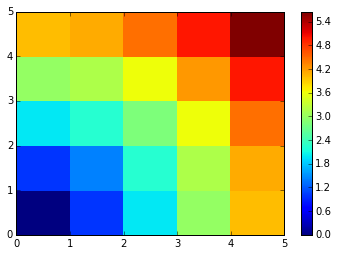

In [24]:
plt.pcolor(distance)
plt.colorbar()

위 그림에서 원점으로부터 떨어진 정도에 따라 색깔이 결정됨을 알 수 있다.
즉, 짙은 남색에 가까울 수록 원점으로부터의 거리가 가깝고,
짙은 빨강에 가까울 수록 원점으로부터의 거리가 멀다.